**کتابخانه های لازم را فراخوانی کردیم**

In [1]:
import numpy as np
import pandas as pd
import os

**فراخوانی فولدر و فایل ها**

In [2]:
DATA_DIR='20_newsgroups'
folders=sorted(os.listdir(os.path.join(DATA_DIR))) # os.listdir gives a list of all files in this path
folders

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
data={} # data = { folder1 : [doc1,doc2,....,doc1000] , folder2 : [doc1,doc2,doc3,....] }
for folder in folders:
    data[folder]=[]
    for file in os.listdir(os.path.join(DATA_DIR,folder)):
        with open(os.path.join(DATA_DIR,folder,file),encoding='latin-1') as opened_file:
            data[folder].append(opened_file.read())

**ساخت کلمات stop words**

In [4]:
from nltk.corpus import stopwords 
from string import punctuation 
punctuations=list(punctuation)
stopWords=stopwords.words('english')
stopWords+=punctuations 

In [5]:
stopWords+=['subject:','from:', 'date:', 'newsgroups:', 'message-id:', 'lines:', 'path:', 'organization:', 
            'would', 'writes:', 'references:', 'article', 'sender:', 'nntp-posting-host:', 'people', 
            'university', 'think', 'xref:', 'cantaloupe.srv.cs.cmu.edu', 'could', 'distribution:', 'first', 
            'anyone','world', 'really', 'since', 'right', 'believe', 'still', 
            "max>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'"]

**ساخت واژه ها و مرتب سازی دیکشنری**

In [6]:
vocab={}
for i in range(len(data)): 
    for doc in data[folders[i]]: 
        for word in doc.split(): 
            if word.lower() not in stopWords and len(word.lower()) >= 5:
                if word.lower() not in vocab:
                    vocab[word.lower()]=1
                else:
                    vocab[word.lower()]+=1
len(vocab)

390170

In [7]:
import operator
sorted_vocab=sorted(vocab.items(),key=operator.itemgetter(1),reverse=True)

**انتخاب ویژگی های نهایی**

In [8]:
# Choosing top 500 vocab words as features
feature_list=[]
for key in sorted_vocab:
    feature_list.append(key[0])
feature_list=feature_list[0:500] # K = 500 (number of words in vocab)

**تبدیل داده به X , Y**

In [9]:
Y=[] # list of newsgroups 
for i in range(len(data)):
    for doc in data[folders[i]]:
        Y.append(folders[i])
Y=np.array(Y)

In [10]:
df = pd.DataFrame(columns = feature_list)
for folder in folders:
    for file in os.listdir(os.path.join(DATA_DIR,folder)):
        df.loc[len(df)] = np.zeros(len(feature_list))
        with open(os.path.join(DATA_DIR,folder,file),encoding='latin-1') as opened_file:
            for word in opened_file.read().split():
                if word.lower() in feature_list:
                    df[word.lower()][len(df)-1] += 1 

In [11]:
df.head()

,going,something,computer,system,might,please,reply-to:,using,never,can't,...,performance,media,serious,output,mouse,designed,russian,friend,opinion,process
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,10.0,0.0,0.0,6.0,3.0,0.0,1.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**نمایش ماتریس همبستگی**

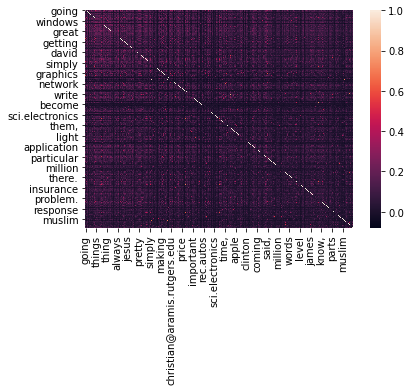

In [12]:
corr = df.corr(method='pearson')
import seaborn as sns
sns.heatmap(corr) 

In [13]:
X=df.values
X

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0., 10.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

**تقسیم داده آموزشی و تست**

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.30)

**ساخت مدل بیز ساده**

In [15]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB()

In [16]:
clf.score(x_test,y_test)

0.7935

**اینبار همان کار بالا را با تفاوت انتخاب 2000 ویژگی انجام می دهیم تا نتایج را مقایسه کنیم**

In [17]:
# Choosing top 2000 vocab words as features
feature_list=[]
for key in sorted_vocab:
    feature_list.append(key[0])
feature_list=feature_list[0:2000] # K = 2000 (number of words in vocab)

In [18]:
Y=[] # list of newsgroups 
for i in range(len(data)):
    for doc in data[folders[i]]:
        Y.append(folders[i])
Y=np.array(Y)

In [19]:
 df = pd.DataFrame(columns = feature_list)
for folder in folders:
    for file in os.listdir(os.path.join(DATA_DIR,folder)):
        df.loc[len(df)] = np.zeros(len(feature_list))
        with open(os.path.join(DATA_DIR,folder,file),encoding='latin-1') as opened_file:
            for word in opened_file.read().split():
                if word.lower() in feature_list:
                    df[word.lower()][len(df)-1] += 1 

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [69]:
from sklearn.naive_bayes import MultinomialNB
clf1=MultinomialNB()
clf1.fit(x_train,y_train)

MultinomialNB()

In [70]:
clf1.score(x_test,y_test)

0.8021666666666667

In [71]:
y_pred=clf1.predict(x_test)

**نمایش معیار های ارزیابی**

In [72]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_pred,y_test)
print(classification_report(y_pred,y_test))

                          precision    recall  f1-score   support

             alt.atheism       0.80      0.67      0.73       331
           comp.graphics       0.74      0.84      0.79       273
 comp.os.ms-windows.misc       0.79      0.86      0.82       280
comp.sys.ibm.pc.hardware       0.87      0.82      0.85       312
   comp.sys.mac.hardware       0.89      0.86      0.87       308
          comp.windows.x       0.82      0.87      0.84       284
            misc.forsale       0.71      0.68      0.70       312
               rec.autos       0.87      0.81      0.84       319
         rec.motorcycles       0.92      0.76      0.83       362
      rec.sport.baseball       0.96      0.91      0.93       331
        rec.sport.hockey       0.97      0.94      0.96       320
               sci.crypt       0.86      0.86      0.86       291
         sci.electronics       0.84      0.82      0.83       284
                 sci.med       0.86      0.81      0.84       328
         

**ماتریس در هم ریختگی**

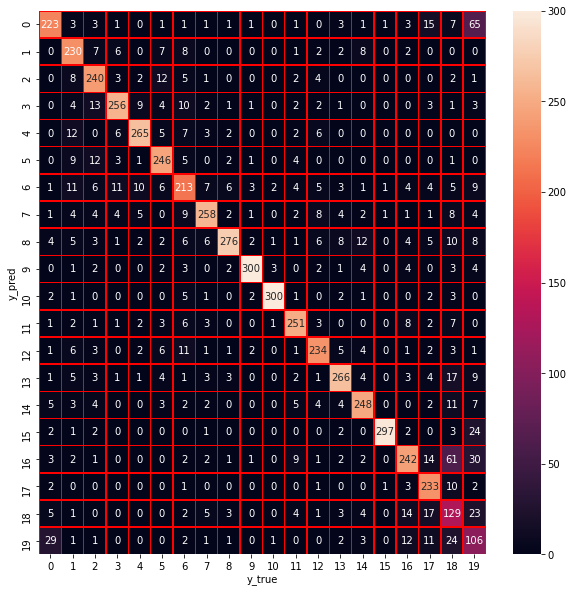

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax=plt.subplots(figsize=(10,10))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.ylabel("y_pred")
plt.xlabel("y_true")
plt.show()